# Exercise 4: Fun with Trees and Ensembles!

In [1]:
# Load packages we need
import sys
import os
import time

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import sklearn

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

# Let's check our software versions
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### SciPy version: ' + sp.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

# load our packages / code
sys.path.insert(1, '../common/')
import utils
import plots

### Python version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
### NumPy version: 1.19.5
### SciPy version: 1.5.0
### Scikit-learn version: 0.23.1
------------


In [2]:
# global parameters to control behavior of the pre-processing, ML, analysis, etc.
seed = 42

np.random.seed(seed) # deterministic seed for reproducibility

## Interesting stuff starts now

In [3]:
# Evaluate the models
# define a function to calculate accuracy
def model_accuracy(model, x, true_y):
    pred = model.predict(x)
    return np.sum(pred == true_y) / true_y.shape[0]

def plot_decision_boundary(model, X, y, fsz=(15,8), xlim=None, ylim=None, 
                           num_classes = 2, plot_colors = "rb", plot_step = 0.02, classes=['Class 1', 'Class 2']):  

    # Plot the decision boundary
    plt.figure(figsize=fsz)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the decision regions (& boundary)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # plot the training points
    for i, color in zip(range(num_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=classes[i],
                    cmap=plt.cm.RdBu, edgecolor='black', s=80, linewidth=2, alpha=0.75)


    plt.legend()

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.show()

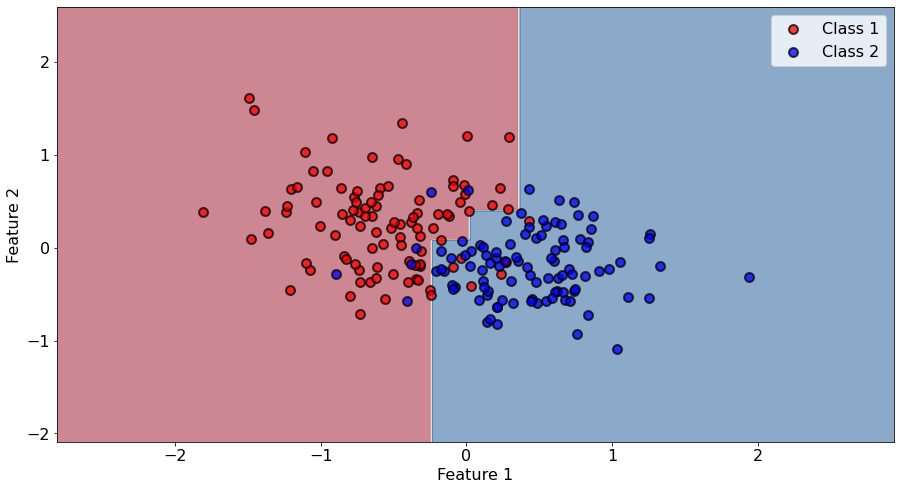

[Decision Tree] Training accuracy: 93.00%


In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# let's create a synthetic data so we can explore
n = 100
sigma1 = 0.5
sigma2 = 0.4
x1 = np.c_[(np.random.randn(n) - 1)*sigma1, (np.random.randn(n) + 0.5)*sigma1]
x2 = np.c_[(np.random.randn(n) + 1)*sigma2, (np.random.randn(n) -0.6)*sigma2]
x = np.r_[x1, x2]

y = np.zeros((2*n,))
y[n:] = 1

# Train
dt = DecisionTreeClassifier(max_depth=3, random_state=seed).fit(x, y)
plot_decision_boundary(dt, x, y)


dt_train_acc = model_accuracy(dt, x, y)

print('[Decision Tree] Training accuracy: {:.2f}%'.format(dt_train_acc*100))

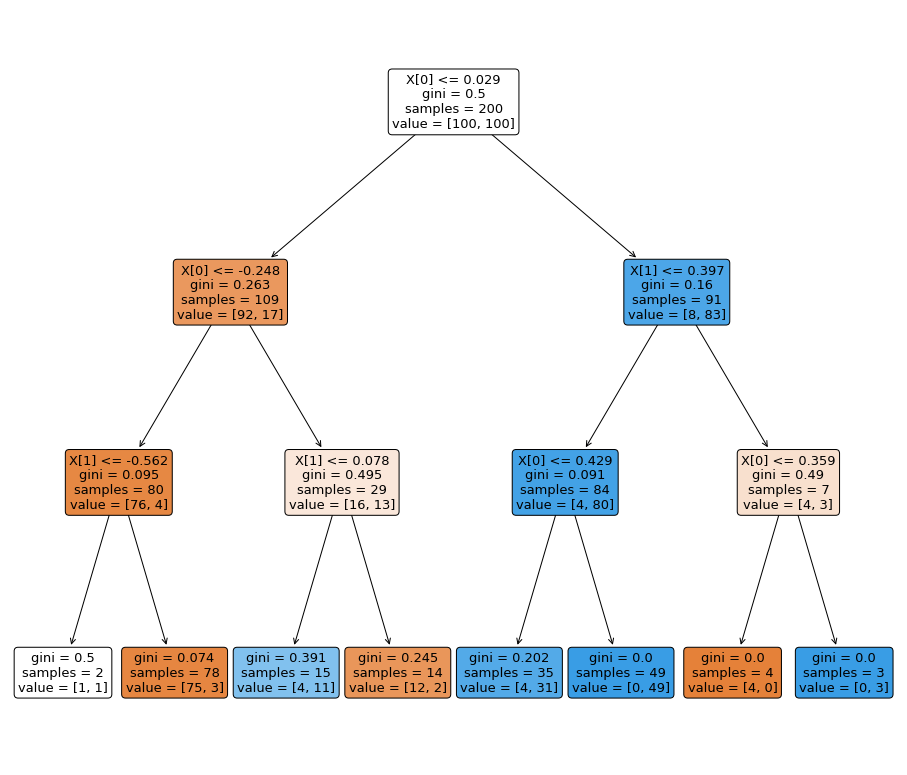

In [5]:
plt.figure(figsize=(16,14))

plot_tree(dt,filled=True, label='all', rounded=True, fontsize=13)

plt.show()

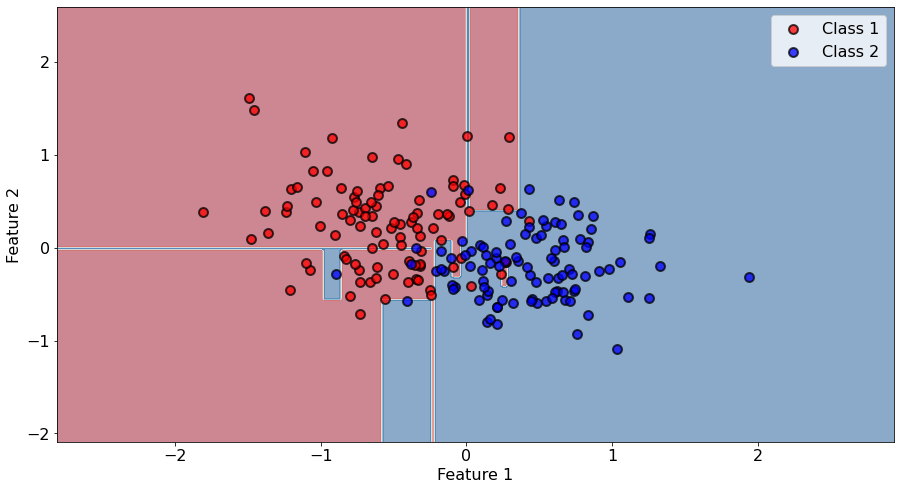

[Decision Tree] Training accuracy: 100.00%


In [6]:
dt = DecisionTreeClassifier(max_depth=None, random_state=seed).fit(x, y)
plot_decision_boundary(dt, x, y)

dt_train_acc = model_accuracy(dt, x, y)

print('[Decision Tree] Training accuracy: {:.2f}%'.format(dt_train_acc*100))

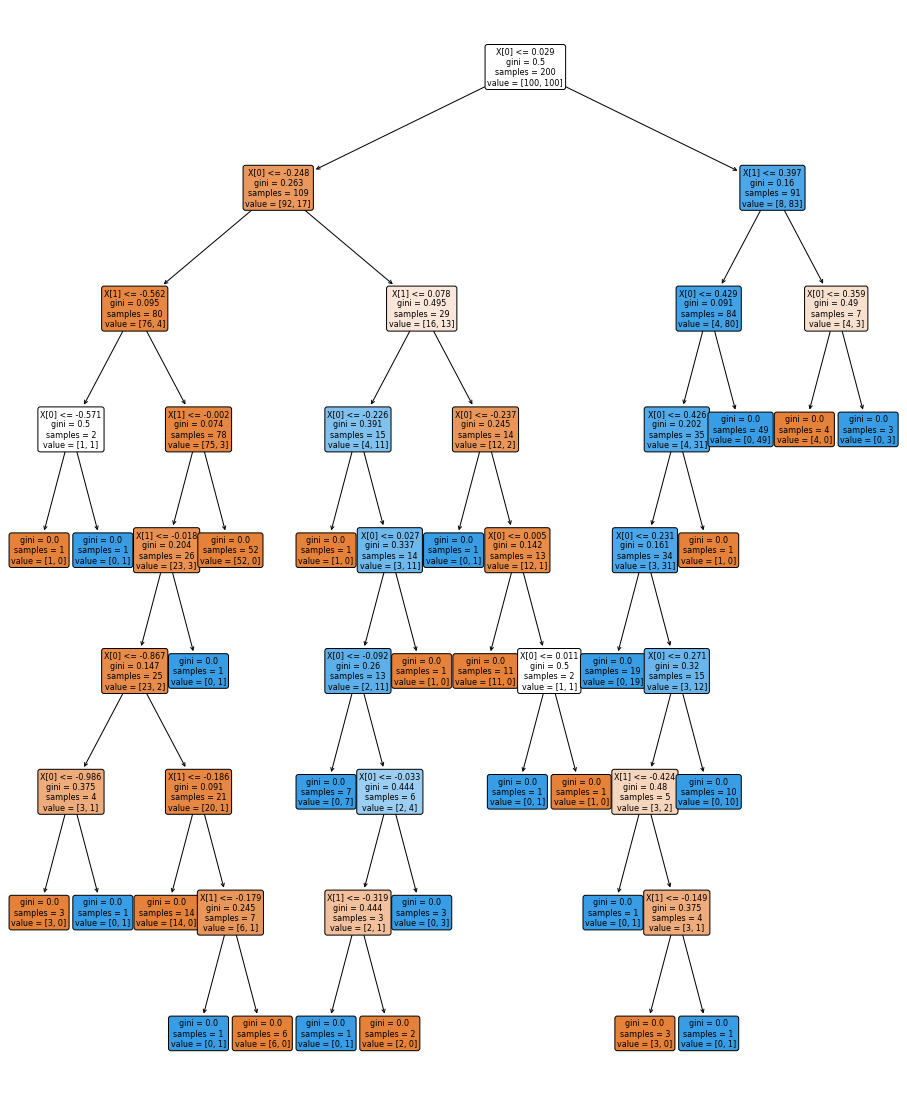

In [7]:
plt.figure(figsize=(16,20))

plot_tree(dt,filled=True, label='all', rounded=True, fontsize=8)

plt.show()

## What kind of decision boundaries can our trees produce?

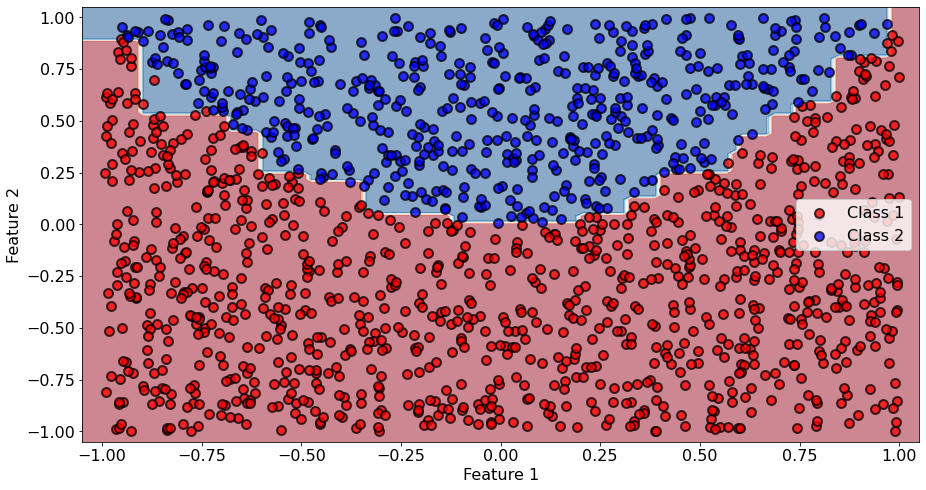

[Decision Tree] Training accuracy: 100.00%


In [8]:
n = 1500

x = np.c_[(np.random.random(n)-0.5)*2, (np.random.random(n)-0.5)*2]

y = np.zeros((n,))
class2_idx = np.where(x[:,0]**2 <= x[:,1])[0]
y[class2_idx] = 1

# Train
dt = DecisionTreeClassifier(max_depth=None, random_state=seed).fit(x, y)
plot_decision_boundary(dt, x, y, xlim=[-1.05,1.05], ylim=[-1.05,1.05])

dt_train_acc = model_accuracy(dt, x, y)

print('[Decision Tree] Training accuracy: {:.2f}%'.format(dt_train_acc*100))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100
building tree 13 of 100

building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100

building tree 19 of 100
building tree 20 of 100building tree 21 of 100

building tree 22 of 100
building tree 23 of 100building tree 24 of 100

building tree 25 of 100
building tree 26 of 100building tree 27 of 100building tree 28 of 100


building tree 29 of 100building tree 30 of 100building tree 31 of 100


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100building tree 35 of 100

building tree 36 of 100
building tree 37 of 100
building tree 38 of 100building tree 39 of 100

building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


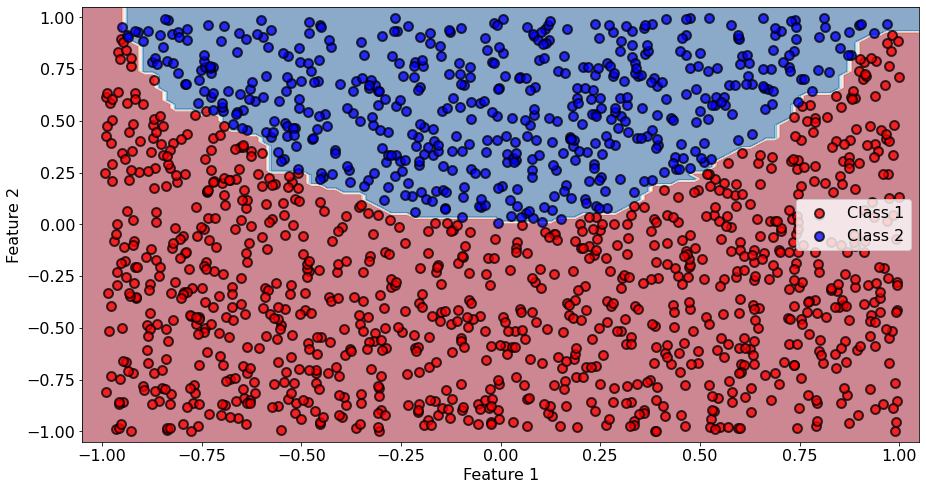

[Random Forest] Training accuracy: 100.00%


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed, verbose=2, n_jobs=-1).fit(x, y)

plot_decision_boundary(rf, x, y, xlim=[-1.05,1.05], ylim=[-1.05,1.05])

rf_train_acc = model_accuracy(dt, x, y)

print('[Random Forest] Training accuracy: {:.2f}%'.format(rf_train_acc*100))

### What about rotations of the feature space?

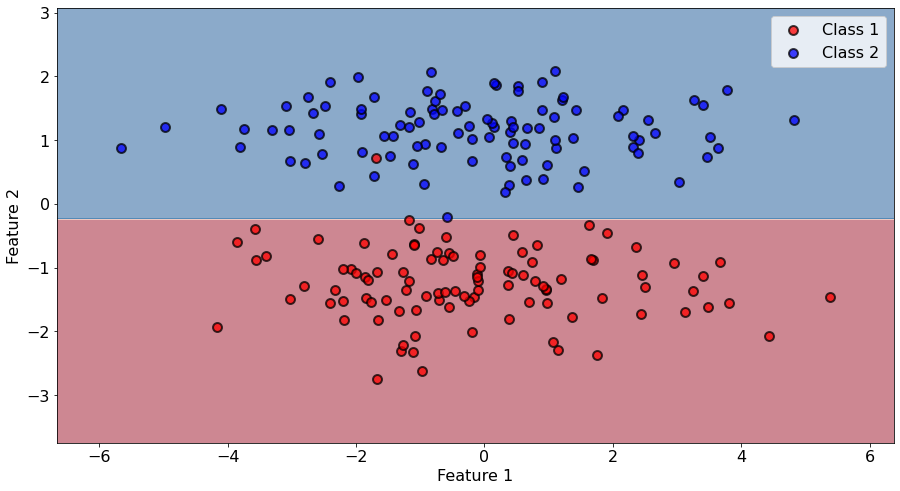

[Decision Tree] Training accuracy: 99.50%


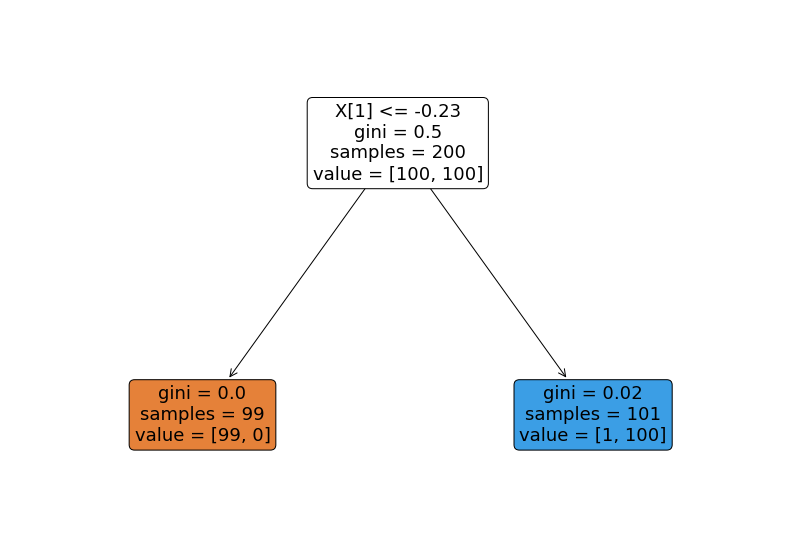

In [10]:
# let's create a synthetic data so we can explore
n = 100
sigma1 = 0.5
sigma2 = 0.5
x1 = np.c_[np.random.randn(n)*2, (np.random.randn(n) - 2.5)*sigma1]
x2 = np.c_[np.random.randn(n)*2, (np.random.randn(n) + 2.5)*sigma2]
x = np.r_[x1, x2]

y = np.zeros((2*n,))
y[n:] = 1
y = y.astype(int)
            
dt = DecisionTreeClassifier(max_depth=1, random_state=seed).fit(x, y)
plot_decision_boundary(dt, x, y)


dt_train_acc = model_accuracy(dt, x, y)

print('[Decision Tree] Training accuracy: {:.2f}%'.format(dt_train_acc*100))

plt.figure(figsize=(14,10))
plot_tree(dt,filled=True, label='all', rounded=True, fontsize=18)
plt.show()

In [11]:
### Let's rotate the features!

(200, 2)


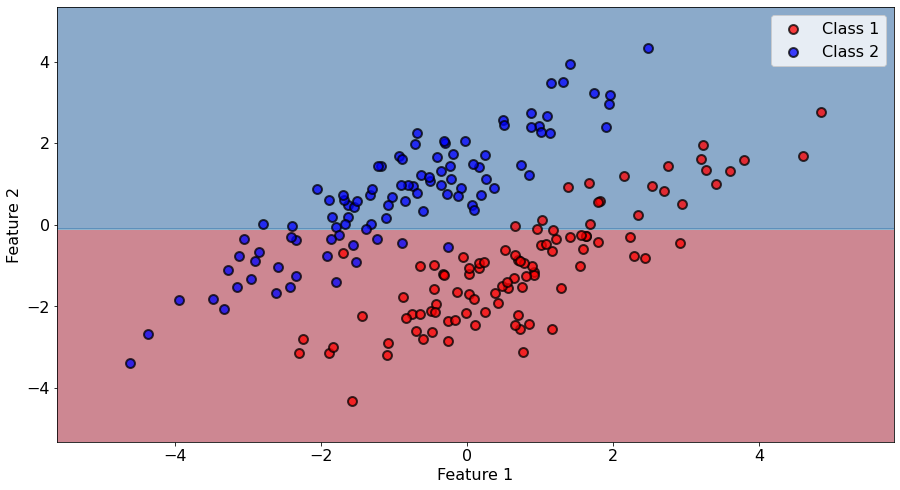

[Decision Tree (rot)] Training accuracy: 76.00%


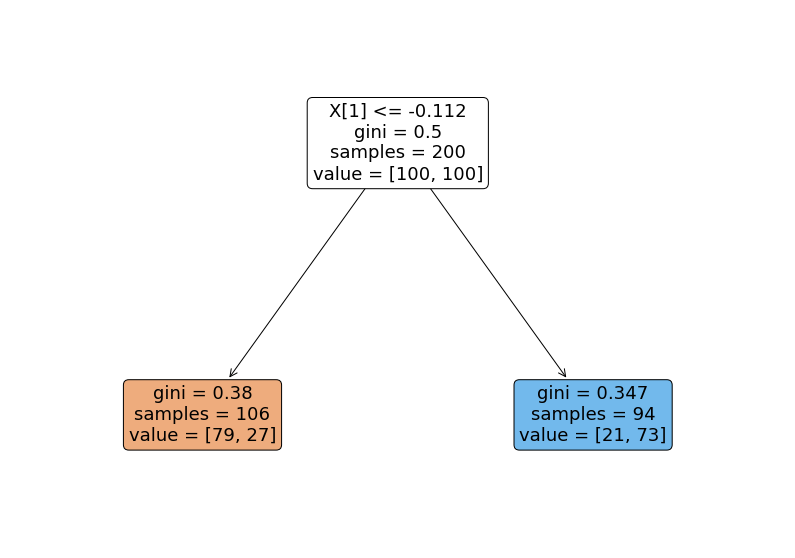

In [12]:
# rotation matrix
theta = np.radians(45)
c = np.cos(theta)
s = np.sin(theta)
R = np.array(((c, -s), (s, c)))

xrot = R.dot(x.T).T
print(xrot.shape)

dt = DecisionTreeClassifier(max_depth=1, random_state=seed).fit(xrot, y)
plot_decision_boundary(dt, xrot, y)


dt_train_acc = model_accuracy(dt, xrot, y)

print('[Decision Tree (rot)] Training accuracy: {:.2f}%'.format(dt_train_acc*100))

plt.figure(figsize=(14,10))
plot_tree(dt,filled=True, label='all', rounded=True, fontsize=18)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression().fit(x, y)
acc = model_accuracy(model, x, y)

model_rot = LogisticRegression().fit(xrot, y)
acc_rot = model_accuracy(model_rot, xrot, y)

print('[Logistic Regression] Accuracy (orig): {:.2f}%, Accuracy (rotated): {:.2f}%'.format(acc*100, acc_rot*100))

[Logistic Regression] Accuracy (orig): 99.00%, Accuracy (rotated): 99.00%


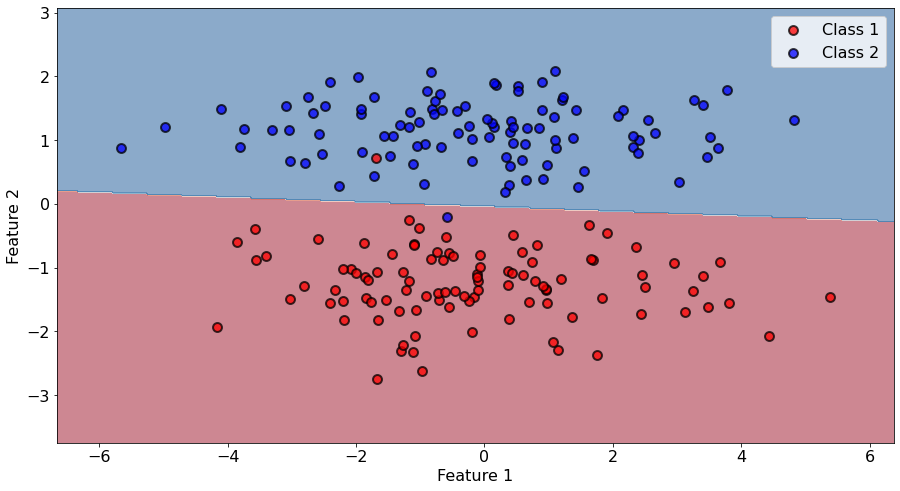

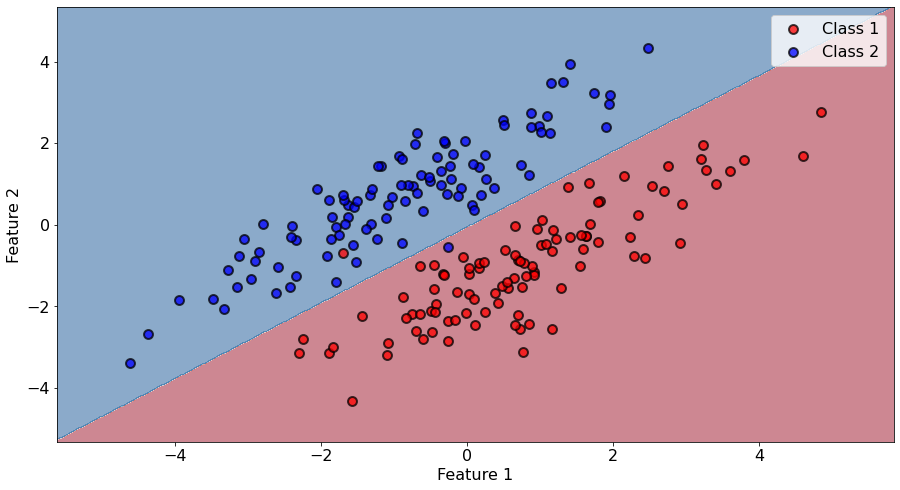

In [14]:
plot_decision_boundary(model, x, y)
plot_decision_boundary(model_rot, xrot, y)

### BTW, for logistic regression, we have probabilities. Let's see how confident is our model.

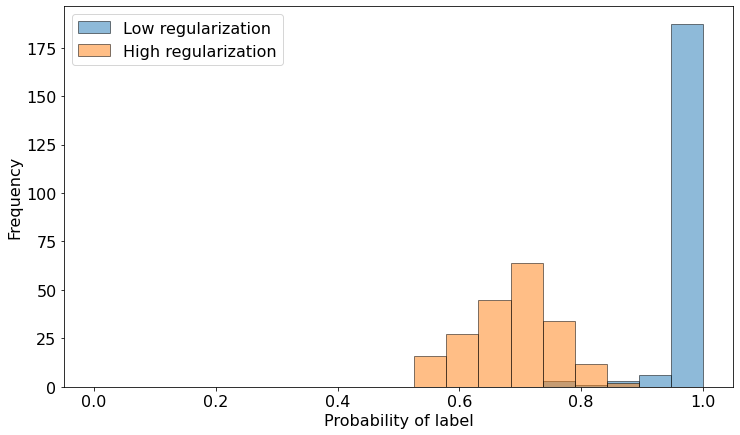

In [15]:
unreg_model = LogisticRegression(C = 100).fit(x, y)
reg_model = LogisticRegression(C = 0.01).fit(x, y)

y_pred_proba_unreg = unreg_model.predict_proba(x)
y_pred_proba_reg = reg_model.predict_proba(x)


plt.figure(figsize=(12,7))
bins = np.linspace(0, 1, 20)
plt.hist(np.amax(y_pred_proba_unreg, axis=1), bins, density=False, alpha=0.5, edgecolor='k', label='Low regularization')
plt.hist(np.amax(y_pred_proba_reg, axis=1), bins, density=False, alpha=0.5, edgecolor='k', label='High regularization')

plt.xlabel('Probability of label')
plt.ylabel('Frequency')

plt.legend(loc='upper left')
plt.show()

### Now, let's load the wine data

In [16]:
# Use pandas to load the data from compressed CSV
#wine_type = 'red'
wine_type = 'white'

df = pd.read_csv('../data/{}-wine-quality.csv'.format(wine_type), header=0, na_values='?', sep=' *; *', skipinitialspace=True, engine='python')

In [17]:
# Check that we loaded the data as expected
if wine_type == 'white':
    df_expected_shape = (4898,12)
else:
    df_expected_shape = (1599,12)
    
assert df.shape == df_expected_shape, 'Unexpected shape of df!'

In [18]:
# Quick tip: use info() to get a glance at the size and attributes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [19]:
# Let's look at a few rows of our dataframe
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [20]:
# how many records do we have?
df.shape

(4898, 12)

### Pre-processing data

In [21]:
## header right now: fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality
col_names = df.columns
col_names = [x for x in col_names]

#### all columns are numerical and the last one 'quality' is what we want to predict
#### Note: quality is a score between 0 (very bad) and 10 (excellent)

In [22]:
# grab all the data as a numpy array
all_xy = np.asarray(df, dtype='float64')
assert all_xy.shape[1] == 12

label_col_idx = all_xy.shape[1]-1
features_col_idx = range(0, label_col_idx)

feature_names = col_names[0:label_col_idx]

#### Let's separate features from labels

In [23]:
# separate features from the label
all_x = all_xy[:,features_col_idx]
all_y = all_xy[:,label_col_idx]
all_y = all_y.astype(int)

### Train, Test, Validation Split

In [24]:
# now split between train, test, and validation
prop_vec = [14, 3, 3]
train_x, train_y, test_x, test_y, val_x, val_y = utils.train_test_val_split(all_x, all_y, prop_vec, shuffle=True, seed=seed)

In [25]:
# sanity check shapes
train_x.shape, train_y.shape, test_x.shape, test_y.shape, val_x.shape, val_y.shape

((3429, 11), (3429,), (735, 11), (735,), (734, 11), (734,))

### Stats & Looking at the data

In [26]:
# what does the distribution of labels look like?
label_name = col_names[-1]
utils.print_array_hist(train_y, label=label_name)

--- quality ---
3: 13
4: 112
5: 1028
6: 1536
7: 607
8: 129
9: 4


In [27]:
# what does the distribution of features look like?
for i in range(train_x.shape[1]):
    utils.print_array_basic_stats(train_x[:, i], label=col_names[i])
    print()

--- fixed acidity ---
min: 4.20
max: 10.70
mean (+- std): 6.85 (+- 0.83)

--- volatile acidity ---
min: 0.08
max: 1.10
mean (+- std): 0.28 (+- 0.10)

--- citric acid ---
min: 0.00
max: 1.23
mean (+- std): 0.33 (+- 0.12)

--- residual sugar ---
min: 0.60
max: 65.80
mean (+- std): 6.34 (+- 5.10)

--- chlorides ---
min: 0.01
max: 0.30
mean (+- std): 0.05 (+- 0.02)

--- free sulfur dioxide ---
min: 2.00
max: 289.00
mean (+- std): 35.25 (+- 17.23)

--- total sulfur dioxide ---
min: 18.00
max: 440.00
mean (+- std): 137.70 (+- 42.01)

--- density ---
min: 0.99
max: 1.04
mean (+- std): 0.99 (+- 0.00)

--- pH ---
min: 2.77
max: 3.81
mean (+- std): 3.19 (+- 0.15)

--- sulphates ---
min: 0.22
max: 1.08
mean (+- std): 0.49 (+- 0.12)

--- alcohol ---
min: 8.00
max: 14.05
mean (+- std): 10.52 (+- 1.23)



## Rescale features

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True)
scaler.fit(all_x) 

scaled_all_x = scaler.transform(all_x)

## Let's change the prediction task. Instead of prediction the quality score, we'll predict good vs. bad wines.

In [29]:
# Let's modify the label to be consistent with the task: good = 1, bad = 0 (binary classification)
numeric_y = all_y
good_idx = np.where(numeric_y >= 6.0)[0]

all_y = np.zeros_like(all_y).astype(int)
all_y[good_idx] = 1

## Let's split the *scaled* data!

In [30]:
# now split between train, test, and validation!
train_x, train_y, test_x, test_y, val_x, val_y = utils.train_test_val_split(scaled_all_x, all_y, prop_vec, shuffle=True, seed=seed)

## Let's train some bagging classifiers!

In [31]:
from sklearn.ensemble import BaggingClassifier
# alternatively we could use random forests

bagmodel = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000, max_samples=1500,
                             bootstrap=True, n_jobs=-1, oob_score=True, random_state=seed)

bagmodel.fit(train_x, train_y)

# can we get an estimate of the performance on the test set without using the test set?
# yes => out of the bag evaluation!
print('[BaggingClassifier] Predicted test accuracy (oob score): {:.2f}%'.format(bagmodel.oob_score_*100))

[BaggingClassifier] Predicted test accuracy (oob score): 81.63%


In [32]:
train_x.shape

(3429, 11)

In [33]:
# Is that estimate any good?
train_acc = model_accuracy(bagmodel, train_x, train_y)
val_acc = model_accuracy(bagmodel, val_x, val_y)
test_acc = model_accuracy(bagmodel, test_x, test_y)

print('[BaggingClassifier] Train accuracy: {:.2f}%, Val. accuracy: {:.2f}%, Test accuracy: {:.2f}%'.format(
    train_acc*100, val_acc*100, test_acc*100))

[BaggingClassifier] Train accuracy: 96.30%, Val. accuracy: 82.29%, Test accuracy: 82.86%
